# **Proyek Analisis Data: E-Commerce Public Dataset**
- **Nama:** Rendika Nurhartanto Suharto
- **Email:** rendikarendi96@gmail.com
- **ID Dicoding:** RENDIKA NURHARTANTO SUHARTO

# **Import Packages/Library**

In [1]:
# ---------------------------- # BASE
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import time
import os
import random
import math

import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.colors as mcolors

# ---------------------------- # CONFIGURATION
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

# Display all columns in DataFrame and set float display format
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

# ---------------------------- # MACHINE LEARNING AND PREPROCESSING LIBRARIES
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.base import BaseEstimator, TransformerMixin

# ---------------------------- # MOUNT GOOGLE DRIVE (For Google Colab)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Data Wrangling**

## *Gathering Data*

In [2]:
# Folder path
mainPath = '/content/drive/MyDrive/Colab Notebooks/Submission 1 - Menyelesaikan Permasalahan Human Resources/'
file_path = os.path.join(mainPath, "employee_data.csv")

In [3]:
df = pd.read_csv(file_path)

In [4]:
df.sample(5)

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1404,1405,32,0.00,Travel_Rarely,859,Research & Development,4,3,Life Sciences,1,3,Female,98,2,2,Manufacturing Director,3,Married,6162,19124,1,Y,No,12,3,3,80,1,14,3,3,14,13,6,8
478,479,29,NaN,Travel_Rarely,468,Research & Development,28,4,Medical,1,4,Female,73,2,1,Research Scientist,1,Single,3785,8489,1,Y,No,14,3,2,80,0,5,3,1,5,4,0,4
421,422,30,1.00,Travel_Rarely,138,Research & Development,22,3,Life Sciences,1,1,Female,48,3,1,Research Scientist,3,Married,2132,11539,4,Y,Yes,11,3,2,80,0,7,2,3,5,2,0,1
1061,1062,34,0.00,Travel_Rarely,1320,Research & Development,20,3,Technical Degree,1,3,Female,89,4,1,Research Scientist,3,Married,2585,21643,0,Y,No,17,3,4,80,0,2,5,2,1,0,0,0
797,798,29,0.00,Travel_Rarely,144,Sales,10,1,Marketing,1,4,Female,39,2,2,Sales Executive,2,Divorced,8268,11866,1,Y,Yes,14,3,1,80,2,7,2,3,7,7,1,7


## *Assessing Data*

In [5]:
def check_duplicates(dataframe, kolom=None):
    """
    Memeriksa nilai duplikat dari DataFrame.
    Menampilkan jumlah duplikat dan 10 nilai duplikat teratas (jika ada).
    Args:
        dataframe (pd.DataFrame): DataFrame yang akan diperiksa.
        kolom (list, optional): Kolom-kolom spesifik yang ingin diperiksa. Jika None, diperiksa semua kolom.
    """
    # Menampilkan nilai duplikat
    print("Nilai Duplikat (10 Teratas):")
    duplicate_values = dataframe[dataframe.duplicated(subset=kolom, keep='first')]
    duplicate_count = duplicate_values.shape[0]
    print(f"Jumlah Duplikat data: {duplicate_count}")
    if duplicate_count > 0:
        display(duplicate_values.head(10))
    else:
        print("Tidak ada duplikat yang ditemukan.")
    print("-" * 30)

def missing_data(data):
    """
    Memeriksa nilai yang hilang di DataFrame.
    Args:
        data (pd.DataFrame): DataFrame yang akan diperiksa.
    Returns:
        pd.DataFrame: DataFrame berisi total dan persentase nilai yang hilang.
    """
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum() / data.isnull().count() * 100).sort_values(ascending=False).round(3)
    missing_df = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

    print(f"\nTotal Kolom dengan Missing Values: {(total > 0).sum()}")
    print("-" * 30)

    return missing_df

In [6]:
check_duplicates(df) # Cek Duplikasi Data pada dataframe yang di combine

Nilai Duplikat (10 Teratas):
Jumlah Duplikat data: 0
Tidak ada duplikat yang ditemukan.
------------------------------


In [7]:
missing_percentage = missing_data(df) # Calculate missing value percentages
missing_percentage


Total Kolom dengan Missing Values: 1
------------------------------


,Total,Percent
Attrition,412,28.03
EmployeeId,0,0.00
StandardHours,0,0.00
NumCompaniesWorked,0,0.00
Over18,0,0.00
OverTime,0,0.00
PercentSalaryHike,0,0.00
PerformanceRating,0,0.00
RelationshipSatisfaction,0,0.00
StockOptionLevel,0,0.00


In [8]:
def detect_outliers_iqr(df):
    """
    Menemukan outlier dengan metode IQR untuk setiap kolom numerik.
    Args:
        df (pd.DataFrame): DataFrame yang akan diperiksa.
    Returns:
        pd.DataFrame: DataFrame dengan status outlier untuk setiap kolom numerik.
    """
    # Menyimpan informasi outlier untuk setiap kolom
    outlier_info = {}

    # Menentukan kolom numerik yang akan diperiksa
    numeric_columns = df.select_dtypes(include=[np.number]).columns

    for col in numeric_columns:
        # Menghitung Q1, Q3, dan IQR untuk kolom
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Menentukan lower dan upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Menandai outliers
        outliers = (df[col] < lower_bound) | (df[col] > upper_bound)
        outlier_info[col] = outliers.sum()  # Jumlah outliers di setiap kolom

    # Menampilkan jumlah outliers per kolom
    outlier_df = pd.DataFrame.from_dict(outlier_info, orient='index', columns=['Outlier Count'])
    outlier_df['Outlier Percentage'] = (outlier_df['Outlier Count'] / len(df)) * 100
    return outlier_df

# Function to plot boxplot for columns with outliers
def plot_boxplots_for_outliers(df):
    """
    Menampilkan boxplot untuk setiap kolom yang memiliki outlier berdasarkan IQR.
    Args:
        df (pd.DataFrame): DataFrame yang akan diperiksa dan divisualisasikan.
    """
    # Menentukan kolom numerik
    numeric_columns = df.select_dtypes(include=[np.number]).columns

    # Menyaring kolom yang memiliki outliers berdasarkan IQR
    outliers = detect_outliers_iqr(df)
    outlier_columns = outliers[outliers['Outlier Count'] > 0].index.tolist()

    if not outlier_columns:
        print("Tidak ada kolom dengan outliers.")
        return

    # Menyiapkan subplot
    num_plots = len(outlier_columns)
    fig, axes = plt.subplots(nrows=(num_plots // 3) + (num_plots % 3 > 0), ncols=3, figsize=(15, 11))
    axes = axes.flatten()

    for i, col in enumerate(outlier_columns):
        sns.boxplot(x=df[col], ax=axes[i])
        axes[i].set_title(f'Boxplot for {col}')

    # Menyesuaikan layout agar tidak saling tumpang tindih
    plt.tight_layout()
    plt.show()

,Outlier Count,Outlier Percentage
EmployeeId,0,0.00
Age,0,0.00
Attrition,179,12.18
DailyRate,0,0.00
DistanceFromHome,0,0.00
Education,0,0.00
EmployeeCount,0,0.00
EnvironmentSatisfaction,0,0.00
HourlyRate,0,0.00
JobInvolvement,0,0.00


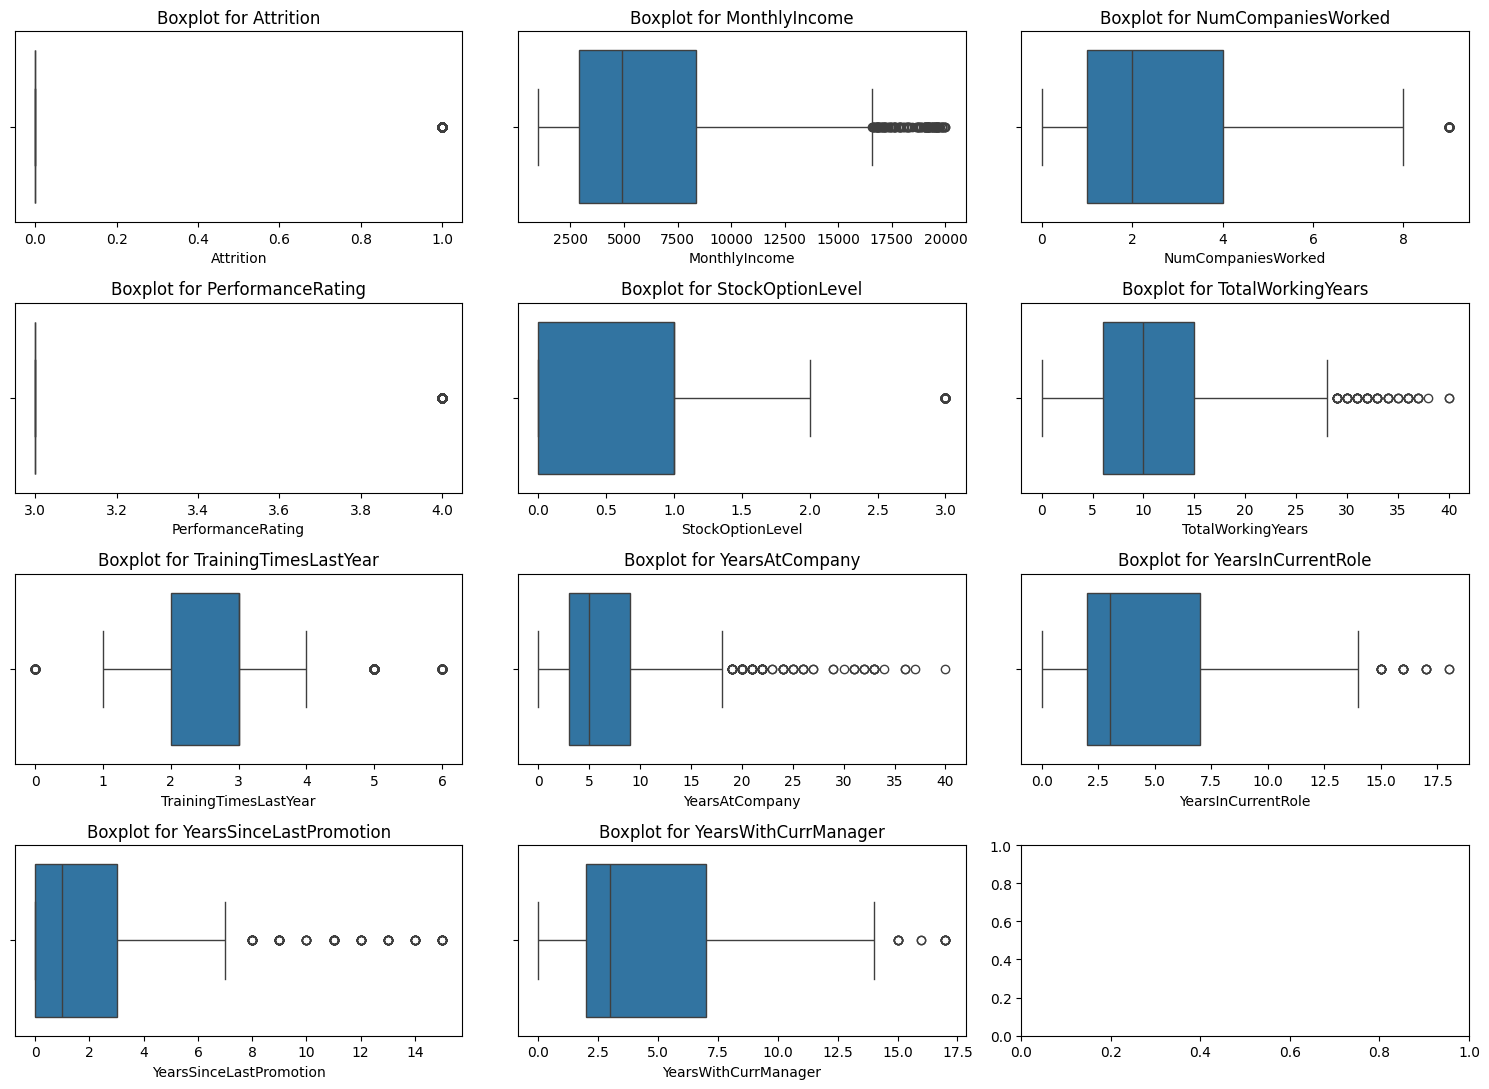

In [9]:
# Tampilkan hasil deteksi outliers menggunakan IQR
display(detect_outliers_iqr(df))

# Plot boxplots untuk kolom dengan outliers
plot_boxplots_for_outliers(df)

## *Cleaning Data*

### Handling Missing Value

In [10]:
# Assuming the dataframe is loaded as 'df'
# Filter data for Attrition = 0.00 and Attrition = 1.00
df_no_attrition = df[df["Attrition"] == 0.00]
df_attrition = df[df["Attrition"] == 1.00]

In [11]:
# Get summary statistics for both groups
summary_no_attrition = df_no_attrition.describe()
summary_attrition = df_attrition.describe()

# Display the summary statistics for each group
print("Summary Statistics for Employees with No Attrition (Attrition = 0.00):")
display(summary_no_attrition)

print("\nSummary Statistics for Employees with Attrition (Attrition = 1.00):")
display(summary_attrition)

Summary Statistics for Employees with No Attrition (Attrition = 0.00):


,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,879.00,879.00,879.00,879.00,879.00,879.00,879.00,879.00,879.00,879.00,879.00,879.00,879.00,879.00,879.00,879.00,879.00,879.00,879.00,879.00,879.00,879.00,879.00,879.00,879.00,879.00,879.00
mean,740.11,37.79,0.00,819.12,8.70,2.89,1.00,2.78,65.80,2.78,2.18,2.80,6982.93,14193.21,2.66,15.15,3.15,2.75,80.00,0.82,12.08,2.80,2.78,7.45,4.52,2.25,4.40
std,427.10,9.16,0.00,408.38,7.91,1.04,0.00,1.07,20.44,0.68,1.15,1.10,4947.91,7006.82,2.49,3.63,0.36,1.08,0.00,0.84,8.00,1.29,0.68,6.25,3.64,3.28,3.64
min,4.00,18.00,0.00,102.00,1.00,1.00,1.00,1.00,30.00,1.00,1.00,1.00,1051.00,2094.00,0.00,11.00,3.00,1.00,80.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,363.50,31.00,0.00,471.50,2.00,2.00,1.00,2.00,48.00,2.00,1.00,2.00,3202.50,8042.00,1.00,12.00,3.00,2.00,80.00,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00
50%,737.00,36.00,0.00,829.00,7.00,3.00,1.00,3.00,66.00,3.00,2.00,3.00,5210.00,14034.00,2.00,14.00,3.00,3.00,80.00,1.00,10.00,3.00,3.00,6.00,3.00,1.00,3.00
75%,1125.50,44.00,0.00,1180.00,11.00,4.00,1.00,4.00,83.00,3.00,3.00,4.00,9407.50,20255.50,4.00,18.00,3.00,4.00,80.00,1.00,17.00,3.00,3.00,10.00,7.00,3.00,7.00
max,1469.00,60.00,0.00,1499.00,29.00,5.00,1.00,4.00,100.00,4.00,5.00,4.00,19999.00,26968.00,9.00,25.00,4.00,4.00,80.00,3.00,38.00,6.00,4.00,37.00,18.00,15.00,17.00



Summary Statistics for Employees with Attrition (Attrition = 1.00):


,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,179.00,179.00,179.00,179.00,179.00,179.00,179.00,179.00,179.00,179.00,179.00,179.00,179.00,179.00,179.00,179.00,179.00,179.00,179.00,179.00,179.00,179.00,179.00,179.00,179.00,179.00,179.00
mean,719.70,33.47,1.00,762.50,10.37,2.80,1.00,2.39,64.85,2.50,1.66,2.53,4872.94,14631.01,2.92,15.20,3.16,2.60,80.00,0.46,8.29,2.63,2.67,5.19,2.99,1.97,2.90
std,429.88,9.83,0.00,406.85,8.54,1.01,0.00,1.15,19.77,0.78,0.99,1.10,3807.24,7256.36,2.70,3.73,0.36,1.16,0.00,0.78,7.34,1.34,0.82,6.00,3.21,3.22,3.12
min,2.00,18.00,1.00,103.00,1.00,1.00,1.00,1.00,31.00,1.00,1.00,1.00,1009.00,2326.00,0.00,11.00,3.00,1.00,80.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,375.50,26.00,1.00,422.50,3.00,2.00,1.00,1.00,49.00,2.00,1.00,1.00,2391.50,9030.00,1.00,12.00,3.00,1.00,80.00,0.00,3.00,2.00,2.00,1.00,0.00,0.00,0.00
50%,680.00,31.00,1.00,699.00,8.00,3.00,1.00,2.00,63.00,3.00,1.00,3.00,3388.00,14922.00,1.00,14.00,3.00,3.00,80.00,0.00,7.00,2.00,3.00,3.00,2.00,1.00,2.00
75%,1091.00,39.00,1.00,1099.50,16.50,4.00,1.00,3.00,82.50,3.00,2.00,3.00,5872.00,21354.00,5.00,18.00,3.00,4.00,80.00,1.00,10.00,3.00,3.00,7.00,4.00,2.00,5.00
max,1470.00,58.00,1.00,1496.00,29.00,5.00,1.00,4.00,100.00,4.00,5.00,4.00,19859.00,26999.00,9.00,25.00,4.00,4.00,80.00,3.00,40.00,6.00,4.00,40.00,15.00,15.00,14.00


In [12]:
# Compare unique values in categorical columns
categorical_columns = df.select_dtypes(include='object').columns

for column in categorical_columns:
    print(f"\nUnique values in {column} for Attrition = 0.00:")
    display(df_no_attrition[column].value_counts())

    print(f"\nUnique values in {column} for Attrition = 1.00:")
    display(df_attrition[column].value_counts())


Unique values in BusinessTravel for Attrition = 0.00:


,count
BusinessTravel,
Travel_Rarely,629
Travel_Frequently,154
Non-Travel,96



Unique values in BusinessTravel for Attrition = 1.00:


,count
BusinessTravel,
Travel_Rarely,117
Travel_Frequently,51
Non-Travel,11



Unique values in Department for Attrition = 0.00:


,count
Department,
Research & Development,594
Sales,253
Human Resources,32



Unique values in Department for Attrition = 1.00:


,count
Department,
Research & Development,107
Sales,66
Human Resources,6



Unique values in EducationField for Attrition = 0.00:


,count
EducationField,
Life Sciences,366
Medical,284
Marketing,96
Technical Degree,71
Other,49
Human Resources,13



Unique values in EducationField for Attrition = 1.00:


,count
EducationField,
Life Sciences,70
Medical,46
Marketing,26
Technical Degree,25
Other,10
Human Resources,2



Unique values in Gender for Attrition = 0.00:


,count
Gender,
Male,512
Female,367



Unique values in Gender for Attrition = 1.00:


,count
Gender,
Male,108
Female,71



Unique values in JobRole for Attrition = 0.00:


,count
JobRole,
Sales Executive,193
Research Scientist,176
Laboratory Technician,139
Manufacturing Director,100
Healthcare Representative,80
Manager,74
Research Director,60
Sales Representative,33
Human Resources,24



Unique values in JobRole for Attrition = 1.00:


,count
JobRole,
Laboratory Technician,49
Sales Executive,39
Research Scientist,38
Sales Representative,25
Healthcare Representative,8
Manufacturing Director,7
Human Resources,6
Manager,5
Research Director,2



Unique values in MaritalStatus for Attrition = 0.00:


,count
MaritalStatus,
Married,402
Single,258
Divorced,219



Unique values in MaritalStatus for Attrition = 1.00:


,count
MaritalStatus,
Single,94
Married,62
Divorced,23



Unique values in Over18 for Attrition = 0.00:


,count
Over18,
Y,879



Unique values in Over18 for Attrition = 1.00:


,count
Over18,
Y,179



Unique values in OverTime for Attrition = 0.00:


,count
OverTime,
No,670
Yes,209



Unique values in OverTime for Attrition = 1.00:


,count
OverTime,
Yes,98
No,81


In [13]:
# Define a function to apply thresholds and predict Attrition
def predict_attrition(row):
    # Thresholds based on our analysis
    if np.isnan(row['Attrition']):
        if row['Age'] < 35:
            return 1.00  # Likely to attrite if young
        elif row['DailyRate'] < 700:
            return 1.00  # Likely to attrite if low daily rate
        elif row['YearsAtCompany'] < 5:
            return 1.00  # Likely to attrite if fewer years at company
        elif row['JobSatisfaction'] < 2:
            return 1.00  # Likely to attrite if low job satisfaction
        elif row['DistanceFromHome'] > 10:
            return 1.00  # Likely to attrite if longer distance from home
        else:
            return 0.00  # Otherwise, assume no attrition
    else:
        return row['Attrition']

# Apply the function to fill NaN values in Attrition column
df['Attrition'] = df.apply(predict_attrition, axis=1)

Here's a **concise summary** of the approach to defining thresholds for predicting employee attrition:

**<h3>Statistical Analysis Insights :</h3>**
1. **Age**: Younger employees (<35 years) tend to have higher attrition rates.
2. **Daily Rate**: Employees earning less (<700) are more likely to leave.
3. **Job Satisfaction**: Employees with low job satisfaction (<2.5) are more likely to attrite.
4. **Distance from Home**: Employees with longer commutes (>10 miles) are more likely to leave.
5. **Years at Company**: Employees with shorter tenure (<5 years) are more likely to leave.

**<h3>Domain Knowledge :</h3>**
1. **Age**: Younger employees (early career stage) seek new opportunities, making them more likely to attrite.
2. **Compensation**: Low pay (<700 daily rate) increases dissatisfaction, leading to higher turnover.
3. **Job Satisfaction**: Low satisfaction results in higher attrition.
4. **Commuting Stress**: Long commutes (>10 miles) contribute to higher attrition due to burnout and stress.
5. **Tenure**: Employees with shorter tenure (<5 years) tend to leave more frequently, as they haven't formed strong organizational ties.

**<h3>Thresholds for Predicting Attrition :</h3>**
- **Age < 35**
- **Daily Rate < 700**
- **Job Satisfaction < 2.5**
- **Distance from Home > 10 miles**
- **Years at Company < 5**

These thresholds combine statistical patterns and domain knowledge, offering a way to fill missing values (NaN) in the `Attrition` column more effectively.

In [14]:
df.to_csv(os.path.join(mainPath, "clean_employee_data.csv"))

# **Exploratory Data Analysis (EDA)**

## *Explore Dataset Structure*
Mengecek ukuran dataset (jumlah baris dan kolom) dan tipe data setiap kolom.

In [ ]:
# Mengecek dimensi dataset dan tipe data
display(df.shape)
display(df.dtypes)

(1470, 35)

,0
EmployeeId,int64
Age,int64
Attrition,float64
BusinessTravel,object
DailyRate,int64
Department,object
DistanceFromHome,int64
Education,int64
EducationField,object
EmployeeCount,int64


## *Explore Descriptive Statistics*
Menghitung statistik dasar seperti mean, median, standar deviasi, min, max, dan quantiles untuk kolom numerik. Memahami distribusi data dalam kolom numerik, misalnya harga, jumlah produk, dll.

In [ ]:
# Menyajikan statistik deskriptif dasar untuk kolom numerik
numeric_columns = df.select_dtypes(include=[np.number]).columns
descriptive_stats = df[numeric_columns].describe()

# Menampilkan statistik deskriptif
display(descriptive_stats)

,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00
mean,735.50,36.92,0.37,802.49,9.19,2.91,1.00,2.72,65.89,2.73,2.06,2.73,6502.93,14313.10,2.69,15.21,3.15,2.71,80.00,0.79,11.28,2.80,2.76,7.01,4.23,2.19,4.12
std,424.50,9.14,0.48,403.51,8.11,1.02,0.00,1.09,20.33,0.71,1.11,1.10,4707.96,7117.79,2.50,3.66,0.36,1.08,0.00,0.85,7.78,1.29,0.71,6.13,3.62,3.22,3.57
min,1.00,18.00,0.00,102.00,1.00,1.00,1.00,1.00,30.00,1.00,1.00,1.00,1009.00,2094.00,0.00,11.00,3.00,1.00,80.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,368.25,30.00,0.00,465.00,2.00,2.00,1.00,2.00,48.00,2.00,1.00,2.00,2911.00,8047.00,1.00,12.00,3.00,2.00,80.00,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00
50%,735.50,36.00,0.00,802.00,7.00,3.00,1.00,3.00,66.00,3.00,2.00,3.00,4919.00,14235.50,2.00,14.00,3.00,3.00,80.00,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00
75%,1102.75,43.00,1.00,1157.00,14.00,4.00,1.00,4.00,83.75,3.00,3.00,4.00,8379.00,20461.50,4.00,18.00,3.00,4.00,80.00,1.00,15.00,3.00,3.00,9.00,7.00,3.00,7.00
max,1470.00,60.00,1.00,1499.00,29.00,5.00,1.00,4.00,100.00,4.00,5.00,4.00,19999.00,26999.00,9.00,25.00,4.00,4.00,80.00,3.00,40.00,6.00,4.00,40.00,18.00,15.00,17.00


# Model Development for HR department.

To improve model's performance, I will try multiple machine learning models and compare their performance to determine which one works best for your HR department's dataset. I will implement and evaluate several models, including:

*   Logistic Regression
*   Support Vector Machine (SVM)
*   K-Nearest Neighbors (KNN)
*   Gradient Boosting Classifier

For each model, we'll evaluate it using accuracy, precision, recall, and F1-score. Then, we'll select the best-performing model and use it for inference.

In [ ]:
# Step 1: Randomly sample 10 rows for inference
inference_data = df.sample(n=10, random_state=42)
train_data = df.drop(inference_data.index)

In [ ]:
# Step 2: Preprocessing Pipeline (Same as before)
categorical_columns = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
numeric_columns = train_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_columns.remove('EmployeeId')  # Exclude 'EmployeeId'
numeric_columns.remove('Attrition')  # Exclude 'Attrition'

# Create transformers for the pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
            ('scaler', StandardScaler())  # Standardize numeric features
        ]), numeric_columns),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values
            ('encoder', OneHotEncoder(handle_unknown='ignore'))  # OneHotEncoder for categorical features
        ]), categorical_columns)
    ])

In [ ]:
# Step 3: Define the features (X) and target (y)
X_train = train_data.drop(['Attrition', 'EmployeeId'], axis=1)  # Drop 'Attrition' and 'EmployeeId' for training
y_train = train_data['Attrition']  # Target column is 'Attrition'

# List of models to evaluate
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

In [ ]:
# Step 4: Train and evaluate each model
model_results = {}

for model_name, model in models.items():
    # Build the pipeline with the current model
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    # Step 5: Train the model
    model_pipeline.fit(X_train, y_train)

    # Step 6: Predict on the training data and evaluate
    y_train_pred = model_pipeline.predict(X_train)

    # Store the evaluation metrics
    accuracy = accuracy_score(y_train, y_train_pred)
    classification_rep = classification_report(y_train, y_train_pred, output_dict=True)

    model_results[model_name] = {
        'accuracy': accuracy,
        'precision': classification_rep['accuracy'],
        'recall': classification_rep['macro avg']['recall'],
        'f1_score': classification_rep['macro avg']['f1-score']
    }

In [ ]:
# Step 7: Display model results
model_comparison_df = pd.DataFrame(model_results).T
print("Model Comparison:")
print(model_comparison_df)

Model Comparison:
                     accuracy  precision  recall  f1_score
Logistic Regression      0.70       0.70    0.65      0.65
SVM                      0.80       0.80    0.75      0.76
KNN                      0.76       0.76    0.72      0.73
Gradient Boosting        0.85       0.85    0.80      0.82


In [ ]:
# Step 8: Select the best model based on highest F1-score (or another metric)
best_model_name = model_comparison_df['f1_score'].idxmax()
best_model = models[best_model_name]

print(f"\nBest Model: {best_model_name} with F1 Score: {model_comparison_df.loc[best_model_name, 'f1_score']:.2f}")


Best Model: Gradient Boosting with F1 Score: 0.82


In [ ]:
# Step 9: Train the best model on the full dataset
best_model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', best_model)
])

best_model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'DailyRate',
                                                   'DistanceFromHome',
                                                   'Education', 'EmployeeCount',
                                                   'EnvironmentSatisfaction',
                                                   'HourlyRate',
                                                   'JobInvolvement', 'JobLevel',
                                                   'JobSatisfaction',
                                                   'MonthlyIncome',
                                                   'MonthlyRate',
                                                   'NumCompaniesWorked',
                                                   'Pe...
                                                   'YearsInCurrentRole',
                                                   'YearsSinceLastPromotion',
                                                   'YearsWithCurrManager']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['BusinessTravel',
                                                   'Department',
                                                   'EducationField', 'Gender',
                                                   'JobRole', 'MaritalStatus',
                                                   'OverTime'])])),
                ('classifier', GradientBoostingClassifier(random_state=42))])

In [ ]:
# Step 10: Inference on the held-out data using the best model
X_inference = inference_data.drop(['Attrition', 'EmployeeId'], axis=1)  # Prepare inference data
y_inference_true = inference_data['Attrition']  # Actual values of Attrition for inference data
y_inference_pred = best_model_pipeline.predict(X_inference)  # Predictions from the best model

# Add the predicted attrition to the inference_data
inference_data['PredictedAttrition'] = y_inference_pred

# Show the predictions
print("\nInference Results (Best Model):")
print(inference_data[['EmployeeId', 'PredictedAttrition', 'Attrition']])


Inference Results (Best Model):
      EmployeeId  PredictedAttrition  Attrition
1041        1042                0.00       1.00
184          185                1.00       1.00
1222        1223                0.00       0.00
67            68                0.00       0.00
220          221                0.00       0.00
494          495                0.00       0.00
430          431                0.00       0.00
240          241                1.00       0.00
218          219                0.00       0.00
49            50                0.00       0.00


In [ ]:
# Step 11: Calculate Accuracy for Inference Data
accuracy_inference = accuracy_score(y_inference_true, y_inference_pred)
print(f"\nInference Accuracy: {accuracy_inference:.2f}")


Inference Accuracy: 0.80
